# Import libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Read the Data Set

In [2]:
# read in dataset
df = pd.read_csv('GOOG.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [4]:
# Rename columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']

In [5]:
# Convert date to datetime type and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


# Data Preprocessing + Visualization

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
df.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [8]:
df.shape

(4902, 6)

In [9]:
# Add our target variable, the next day's closing price
df["Tomorrow"] = df["Close"].shift(-1)
df.head()

,Open,High,Low,Close,AdjClose,Volume,Tomorrow
Date,,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2.724787
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2.611960
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2.640104
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2.687676
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,2.643840


In [10]:
# Check for missing values
df.isna().sum()

Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
Tomorrow    1
dtype: int64

In [11]:
# Drop missing values
df.dropna(inplace=True)
df.isna().sum()

Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
Tomorrow    0
dtype: int64

In [12]:
# Check if 'Close' and 'AdjClose' have any differing values
(df['Close'] == df['AdjClose']).value_counts()

True    4901
dtype: int64

In [13]:
# Since 'Close' contains the same values as 'AdjClose', we drop the AdjClose column
df.drop(['AdjClose'], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,2.724787
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,2.611960
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,2.640104
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,2.687676
2004-08-26,2.613952,2.688672,2.606729,2.687676,142572401,2.643840


Text(0.5, 1.0, 'Google Stock Closing Price')

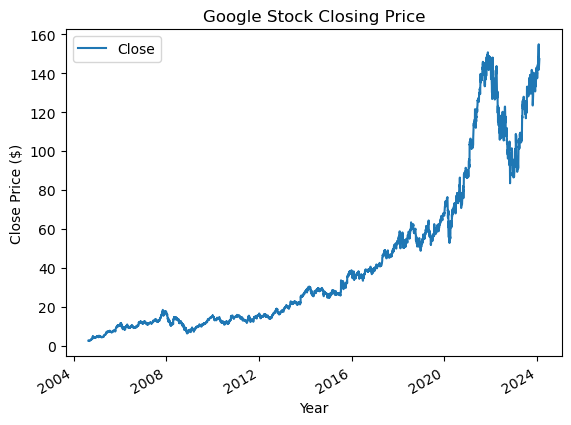

In [14]:
# Graph tomorrow's close price
df.plot.line(y="Close")
plt.ylabel('Close Price ($)')
plt.xlabel('Year')
plt.title('Google Stock Closing Price')

### Scaling features

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

# Set our input and output columns
input_cols = ['Open', 'High', 'Low',	'Close', 'Volume']
X, y = df[input_cols], df[['Tomorrow']]

# Fit and transform the input columns
X_scaled = scaler.fit_transform(X)
df[input_cols] = X_scaled

In [16]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2004-08-20,0.000299,0.001197,0.000258,0.001357,0.277886,2.724787
2004-08-23,0.001900,0.001915,0.001674,0.001535,0.222151,2.611960
2004-08-24,0.001981,0.001609,0.000766,0.000795,0.185523,2.640104
2004-08-25,0.000948,0.001021,0.000818,0.000979,0.111765,2.687676
2004-08-26,0.000947,0.001013,0.000947,0.001292,0.086276,2.643840


## Splitting training and test data

In [17]:
# Split data into df_train and df_test
split_ratio = 0.9
split_index = int(len(df) * split_ratio)
df_train, df_test = df[:split_index], df[split_index:]
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Rename df_test from 'Tomorrow' to 'Actual'
df_test = df_test.drop(input_cols, axis=1)
df_test = df_test.rename(columns={"Tomorrow": "Actual"})

df_test.head()

,Actual
Date,
2022-02-25,134.891006
2022-02-28,134.167999
2022-03-01,134.751495
2022-03-02,134.307999
2022-03-03,132.121994


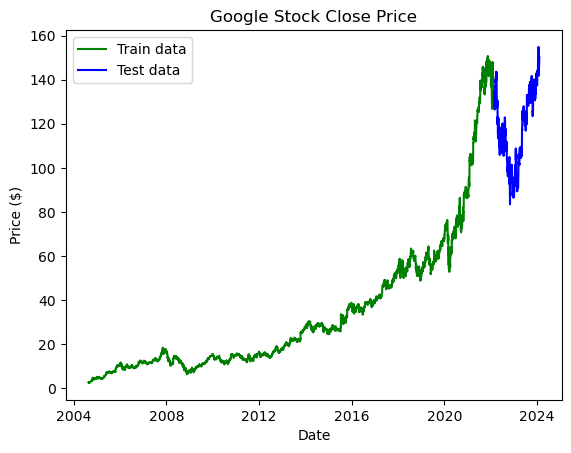

In [18]:
# Plot train and test data
plt.plot(y_train['Tomorrow'], 'green', label='Train data')
plt.plot(y_test['Tomorrow'], 'blue', label='Test data')
plt.title('Google Stock Close Price')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend()

## Optimizing Parameters using GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000, 2000],
    'max_features': [None, 'sqrt','log2'],
    'max_depth': [None,2,3,4,5,6],
    'bootstrap': [True, False],
    'random_state' : [156]
}

## Run GridSearchCV function
grid_randomforest = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
model = grid_randomforest.fit(X_train, np.ravel(y_train))

In [20]:
# Output the results of GridSearchCV
print(" Results from Grid Search " )
print("\n The best estimator across all searched params:\n",grid_randomforest.best_estimator_)
print("\n The best score across all searched params:\n",grid_randomforest.best_score_)
print("\n The best parameters across all searched params:\n",grid_randomforest.best_params_)

 Results from Grid Search 

 The best estimator across all searched params:
 RandomForestRegressor(max_features='sqrt', n_estimators=400, random_state=156)

 The best score across all searched params:
 0.6022196906299266

 The best parameters across all searched params:
 {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 156}


In [21]:
print(model)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500, 1000, 2000],
                         'random_state': [156]})


## Train the model

In [22]:
# Use best parameters output by GridSearchCV
model = RandomForestRegressor(max_features='sqrt', n_estimators=400, random_state=156)

model = model.fit(X_train, np.ravel(y_train))

predicted_values = model.predict(X_test)
df_test['Predicted'] = predicted_values

df_test.head()

,Actual,Predicted
Date,,
2022-02-25,134.891006,135.433128
2022-02-28,134.167999,136.054562
2022-03-01,134.751495,136.021453
2022-03-02,134.307999,135.989155
2022-03-03,132.121994,135.380731


## Evaluate Results

In [23]:
# Print MSE, MAE, and RMSE
mse = mean_squared_error(df_test['Actual'], df_test['Predicted'])
mae = mean_absolute_error(df_test['Actual'], df_test['Predicted'])
rmse = math.sqrt(mean_squared_error(df_test['Actual'], df_test['Predicted']))
print('MSE:\t', str(mse))
print('MAE:\t', str(mae))
print('RMSE:\t', str(rmse))

MSE:	 8.34057021815275
MAE:	 2.225937444684293
RMSE:	 2.888004539150302


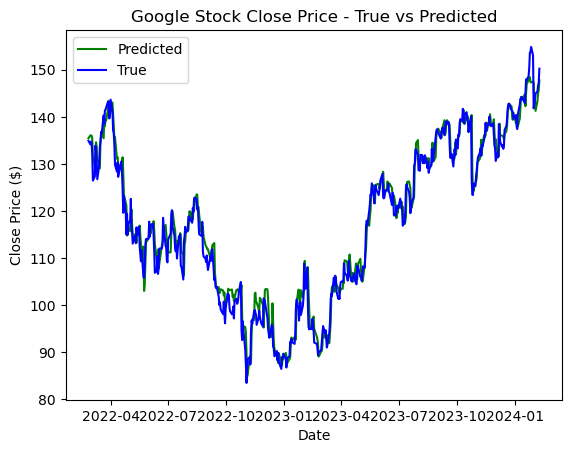

In [24]:
# Plot predicted vs true stock price
plt.title('Google Stock Close Price - True vs Predicted')
plt.plot(df_test.index, df_test['Predicted'], color = 'green', label = 'Predicted')
plt.plot(df_test.index, df_test['Actual'], color = 'blue', label = 'True')
plt.ylabel('Close Price ($)')
plt.xlabel('Date')
plt.legend()
plt.show()

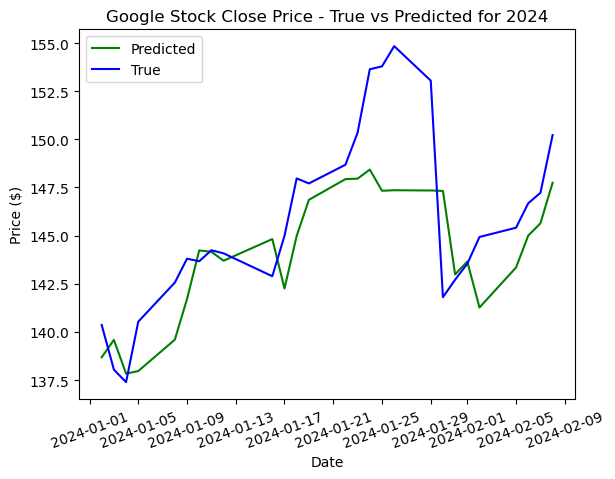

In [25]:
# Plot results for 2024 only

df_eval_2024_onwards = df_test[df_test.index.year >= 2024]
plt.title('Google Stock Close Price - True vs Predicted for 2024')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_eval_2024_onwards['Predicted'], 'green', label='Predicted')
plt.plot(df_eval_2024_onwards['Actual'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend(loc='upper left')
plt.show()